<a href="https://colab.research.google.com/github/sharavana07/ACE_Hack/blob/main/EXPERIMENT_5(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

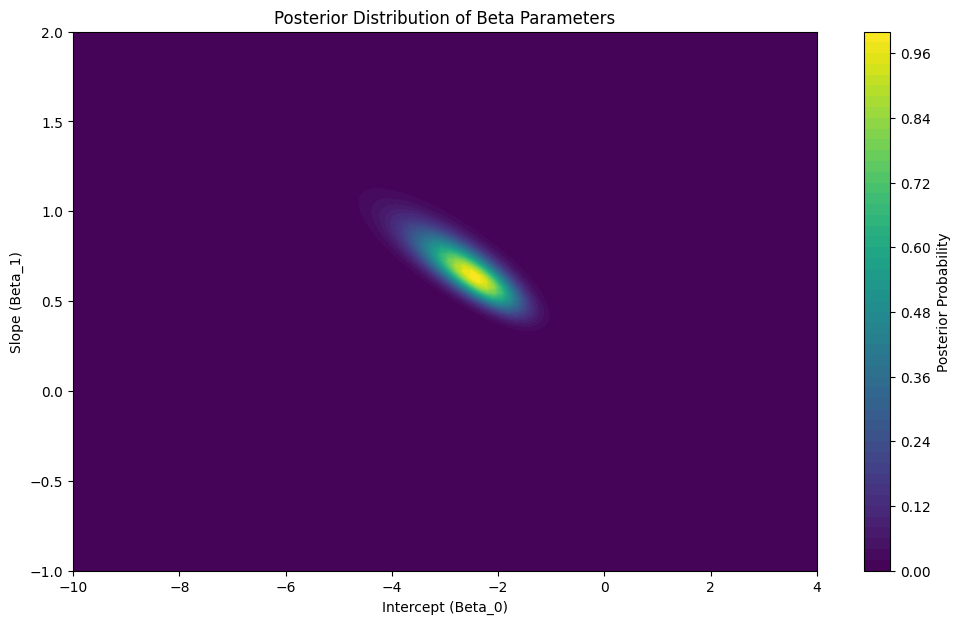

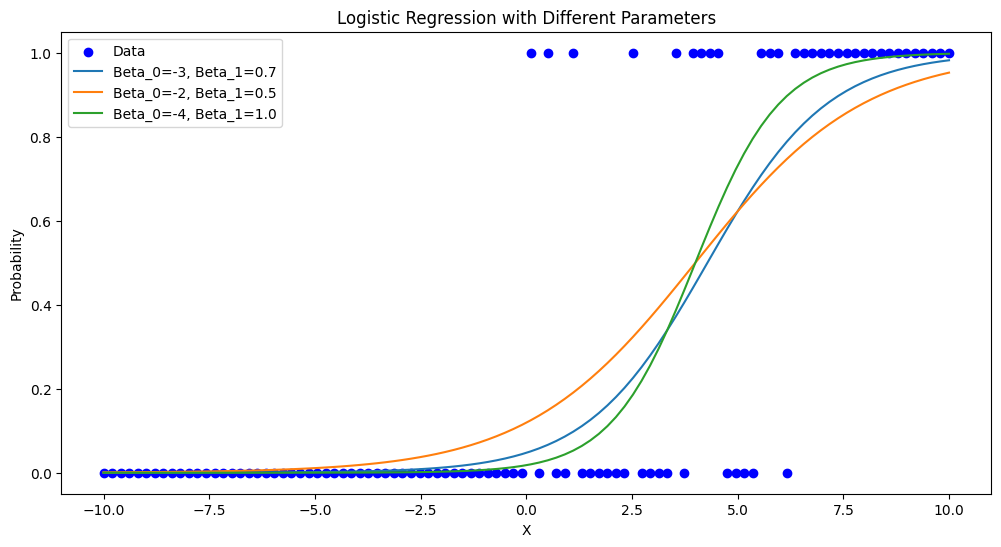

In [4]:
# ===========================
# Bayesian Logistic Regression (Colab Version)
# ===========================

# Install required packages
!pip install numpy matplotlib scipy

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid function
from scipy.stats import norm

# ---------------------------
# Step 1: Generate Synthetic Data
# ---------------------------
np.random.seed(42)
N = 100
X = np.linspace(-10, 10, N)
true_beta_0 = -3   # Intercept
true_beta_1 = 0.7  # Slope

# Generate binary output using logistic function
y = np.random.binomial(1, expit(true_beta_0 + true_beta_1 * X))

# ---------------------------
# Step 2: Define Prior, Likelihood, and Posterior
# ---------------------------

# Prior distribution (Normal priors)
def prior(beta_0, beta_1):
    return norm.pdf(beta_0, 0, 5) * norm.pdf(beta_1, 0, 5)

# Likelihood function
def likelihood(beta_0, beta_1, X, y):
    p = expit(beta_0 + beta_1 * X)
    return np.prod(np.power(p, y) * np.power(1 - p, 1 - y))

# Posterior distribution (unnormalized)
def posterior(beta_0, beta_1, X, y):
    return likelihood(beta_0, beta_1, X, y) * prior(beta_0, beta_1)

# ---------------------------
# Step 3: Compute Posterior over Grid
# ---------------------------
beta_0_vals = np.linspace(-10, 4, 100)
beta_1_vals = np.linspace(-1, 2, 100)
posterior_vals = np.zeros((len(beta_0_vals), len(beta_1_vals)))

# Compute posterior for each (beta_0, beta_1)
for i, beta_0 in enumerate(beta_0_vals):
    for j, beta_1 in enumerate(beta_1_vals):
        posterior_vals[i, j] = posterior(beta_0, beta_1, X, y)

# Normalize for better visualization
posterior_vals /= np.max(posterior_vals)

# ---------------------------
# Step 4: Plot Posterior Contour
# ---------------------------
plt.figure(figsize=(12, 7))
plt.contourf(beta_0_vals, beta_1_vals, posterior_vals.T, levels=50, cmap='viridis')
plt.colorbar(label='Posterior Probability')
plt.xlabel('Intercept (Beta_0)')
plt.ylabel('Slope (Beta_1)')
plt.title('Posterior Distribution of Beta Parameters')
plt.show()

# ---------------------------
# Step 5: Plot Logistic Regression Curves
# ---------------------------
plt.figure(figsize=(12, 6))
plt.scatter(X, y, c='blue', label='Data')

# Plot sample logistic regression lines
for beta_0, beta_1 in [(-3, 0.7), (-2, 0.5), (-4, 1.0)]:
    plt.plot(X, expit(beta_0 + beta_1 * X), label=f'Beta_0={beta_0}, Beta_1={beta_1}')

plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Logistic Regression with Different Parameters')
plt.legend()
plt.show()
